Data Exploration and Analysis of the new dataset in data/parlamint-at.tgz

In [ ]:
#installing all packages via required txt.
#pip install -r requirements.txt
#downloading the Data set 

     ---------------------------------------- 11.1/11.1 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 13.0/13.0 MB 7.8 MB/s eta 0:00:00
     -------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
     -------------------------------------- 299.9/299.9 kB 9.3 MB/s eta 0:00:00
     --------------------------------------- 10.7/10.7 MB 13.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 10.5/10.5 MB 9.1 MB/s eta 0:00:00
     -------------------------------------- 216.1/216.1 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 kB 6.4 MB/s eta 0:00:00
     -------------------------------------- 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from data_processing import get_data
import nltk
from transformers import AutoTokenizer
import torch
from tqdm import tqdm
import re
import spacy

nltk.download('stopwords')
from nltk.corpus import stopwords
import multiprocessing

c:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lukas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Data loading:

In [4]:
corpus_df = get_data()

Retrieving data from ParlaMint-AT...


FileNotFoundError: [Errno 2] No such file or directory: './data/ParlaMint-AT.tgz'

In [3]:
corpus_df.head()

,ID,text,Text_ID,Title,Date,Body,Term,Session,Meeting,Sitting,...,Speaker_MP,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth
0,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001_d7...,Bitte Platz zu nehmen. – Ich bitte auch die Ph...,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001,"Sitting Number 1, Legislative period XX, Monda...",1996-01-15,Lower house,Legislative period XX,-,-,Sitting 1,...,MP,notMinister,SPÖ,parliamentary group of the Social Democratic P...,Coalition,Centre-left,PAD_00334,"Fischer, Heinz",M,1938
1,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001_d7...,Der Herr Bundespräsident hat mit Entschließung...,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001,"Sitting Number 1, Legislative period XX, Monda...",1996-01-15,Lower house,Legislative period XX,-,-,Sitting 1,...,MP,notMinister,SPÖ,parliamentary group of the Social Democratic P...,Coalition,Centre-left,PAD_00334,"Fischer, Heinz",M,1938
2,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001_d7...,Wir gehen in die Tagesordnung ein und gelangen...,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001,"Sitting Number 1, Legislative period XX, Monda...",1996-01-15,Lower house,Legislative period XX,-,-,Sitting 1,...,MP,notMinister,SPÖ,parliamentary group of the Social Democratic P...,Coalition,Centre-left,PAD_00334,"Fischer, Heinz",M,1938
3,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001_d7...,Sie werden geloben unverbrüchliche Treue der R...,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001,"Sitting Number 1, Legislative period XX, Monda...",1996-01-15,Lower house,Legislative period XX,-,-,Sitting 1,...,MP,notMinister,SPÖ,parliamentary group of the Social Democratic P...,Coalition,Centre-left,PAD_01153,"Parfuss, Ludmilla",F,1942
4,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001_d7...,Danke. Die Angelobung ist damit beendet. Meine...,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001,"Sitting Number 1, Legislative period XX, Monda...",1996-01-15,Lower house,Legislative period XX,-,-,Sitting 1,...,MP,notMinister,SPÖ,parliamentary group of the Social Democratic P...,Coalition,Centre-left,PAD_00334,"Fischer, Heinz",M,1938


In [4]:
corpus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231759 entries, 0 to 231758
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ID                  231759 non-null  object
 1   text                231759 non-null  object
 2   Text_ID             231759 non-null  object
 3   Title               231759 non-null  object
 4   Date                231759 non-null  object
 5   Body                231759 non-null  object
 6   Term                231759 non-null  object
 7   Session             231759 non-null  object
 8   Meeting             231759 non-null  object
 9   Sitting             231759 non-null  object
 10  Agenda              231759 non-null  object
 11  Subcorpus           231759 non-null  object
 12  Lang                231759 non-null  object
 13  Speaker_role        231759 non-null  object
 14  Speaker_MP          231759 non-null  object
 15  Speaker_minister    231759 non-null  object
 16  Sp

# Preprocessing

Normalization

In [5]:
tqdm.pandas()

# common phrases to strip
common_phrases = [
    # Ceremonial/formal openings
    'sehr geehrte damen und herren',
    'meine damen und herren',
    'liebe kolleginnen und kollegen',
    'werte kolleginnen und kollegen',
    'geschätzte damen und herren',
    'liebe zuseherinnen und zuseher',
    'geschätzte zuseherinnen und zuseher',
    'ich darf sie begrüßen',
    'ich begrüße sie herzlich',
    'herzlich willkommen',

    # Parliamentary speaker roles
    'sehr geehrter herr präsident',
    'sehr geehrte frau präsidentin',
    'herr präsident',
    'frau präsidentin',
    'herr bundespräsident',
    'frau bundesministerin',
    'herr bundesminister',
    'herr bundeskanzler',
    'herr staatssekretär',
    'frau staatssekretärin',
    'frau abgeordnete',
    'herr abgeordneter',
    'nächster redner',
    'nächste rednerin',
    'zu wort gemeldet ist',
    'die nächste rednerin ist',
    'die nächste sprecherin ist',
    'ich erteile das wort',
    'sie haben das wort',
    'bitte sehr',
    'danke schön',
    'vielen dank',
    'ich danke ihnen',

    # Procedural expressions
    'ich darf',
    'ich danke',
    'ich ersuche',
    'ich melde mich',
    'ich möchte betonen',
    'ich möchte sagen',
    'ich sage',
    'ich glaube',
    'ich denke',
    'ich bin der meinung',
    'ich finde',
    'ich möchte hinzufügen',
    'ich möchte festhalten',
    'ich möchte hervorheben',

    # Common contextless fillers
    'bitte',
    'danke',
    'sehr',
    'wichtig',
    'eigentlich',
    'nämlich',
    'gut',
    'sagen',
    'wissen',
    'müssen',
    'gehen',
    'kommen',
    'sehen',
    'geben',
    'nehmen',
    'sollen',
    'machen',
    'haben',
    'werden',
    'können',
    'müssen',
    'dürfen',
    'ja',
    'nein',
    'immer',
    'heute',
    'morgen',
    'gestern',
    'weiter',
    'mehr',
    'weniger',
    'vielleicht',
    'natürlich',
    'eigentlich',
    'wirklich',
    'nächster',
    'nächste',
    'österreich',  # optionally skip if you're doing thematic analysis, but useful to remove if too dominant
]

# lowercase and remove fixed phrases
def normalize_text(text):
    if pd.isnull(text) or not isinstance(text, str):
        return ''
    text = text.lower().strip()
    for phrase in common_phrases:
        text = text.replace(phrase, '')
    return text

corpus_df['text'] = corpus_df['text'].progress_apply(normalize_text)
corpus_df = corpus_df[corpus_df['text'].str.strip() != '']


100%|██████████| 231759/231759 [00:25<00:00, 8960.43it/s] 


Tokenize the text

In [6]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-german-cased")

# autodetect device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

texts = corpus_df['text'].astype(str).fillna('').str.strip().tolist()

batch_size = 32
tokenized_texts = []
for i in tqdm(range(0, len(texts), batch_size), desc="Tokenizing"):
    batch = texts[i:i+batch_size]
    tokens = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to(device)
    decoded = tokenizer.batch_decode(tokens['input_ids'], skip_special_tokens=True)
    tokenized_texts.extend(decoded)

corpus_df['text'] = tokenized_texts

Tokenizing: 100%|██████████| 7243/7243 [02:07<00:00, 56.70it/s]


Lemmatize the texts

In [7]:
nlp = spacy.load("de_core_news_sm")

# Prepare your texts
texts = corpus_df['text'].astype(str).fillna('').tolist()

# Function to lemmatize a batch
def lemmatize_batch(docs):
    for doc in docs:
        lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
        yield ' '.join(lemmas)

n_cores = multiprocessing.cpu_count()
n_process = max(1, n_cores - 1)
print(f"Running with {n_process} processes")

# Run spaCy in parallel (use n_process > 1)
lemmatized_texts = list(
    tqdm(
        lemmatize_batch(nlp.pipe(texts, n_process=n_process, batch_size=100)),  # Adjust n_process as needed
        total=len(texts),
        desc="Lemmatizing"
    )
)

# Assign back to DataFrame
corpus_df['text'] = lemmatized_texts

Running with 11 processes


Lemmatizing: 100%|██████████| 231757/231757 [16:38<00:00, 232.22it/s]


Remove german stop words

In [8]:
GERMAN_STOPWORDS = set(stopwords.words('german'))

def remove_stopwords_only(text):
    if pd.isnull(text) or not isinstance(text, str):
        return ''
    tokens = re.findall(r'\b\w+\b', text)
    return ' '.join(t for t in tokens if t.lower() not in GERMAN_STOPWORDS)

corpus_df['text'] = corpus_df['text'].progress_apply(remove_stopwords_only)
corpus_df = corpus_df[corpus_df['text'].str.strip() != '']

100%|██████████| 231757/231757 [00:10<00:00, 22562.96it/s]


In [9]:
corpus_df.isnull().sum()

ID                    0
text                  0
Text_ID               0
Title                 0
Date                  0
Body                  0
Term                  0
Session               0
Meeting               0
Sitting               0
Agenda                0
Subcorpus             0
Lang                  0
Speaker_role          0
Speaker_MP            0
Speaker_minister      0
Speaker_party         0
Speaker_party_name    0
Party_status          0
Party_orientation     0
Speaker_ID            0
Speaker_name          0
Speaker_gender        0
Speaker_birth         0
dtype: int64

In [10]:
corpus_df.head()

,ID,text,Text_ID,Title,Date,Body,Term,Session,Meeting,Sitting,...,Speaker_MP,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth
0,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001_d7...,Platz Photograph Tätigkeit einstellen erster k...,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001,"Sitting Number 1, Legislative period XX, Monda...",1996-01-15,Lower house,Legislative period XX,-,-,Sitting 1,...,MP,notMinister,SPÖ,parliamentary group of the Social Democratic P...,Coalition,Centre-left,PAD_00334,"Fischer, Heinz",M,1938
1,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001_d7...,Entschließung 9 Jänner gemäß Artikel 27 abs 2 ...,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001,"Sitting Number 1, Legislative period XX, Monda...",1996-01-15,Lower house,Legislative period XX,-,-,Sitting 1,...,MP,notMinister,SPÖ,parliamentary group of the Social Democratic P...,Coalition,Centre-left,PAD_00334,"Fischer, Heinz",M,1938
2,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001_d7...,Tagesordnung gelangen 1 Punkt Angelobung abgeo...,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001,"Sitting Number 1, Legislative period XX, Monda...",1996-01-15,Lower house,Legislative period XX,-,-,Sitting 1,...,MP,notMinister,SPÖ,parliamentary group of the Social Democratic P...,Coalition,Centre-left,PAD_00334,"Fischer, Heinz",M,1938
3,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001_d7...,geloben unverbrüchlich Treue Republik stet vol...,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001,"Sitting Number 1, Legislative period XX, Monda...",1996-01-15,Lower house,Legislative period XX,-,-,Sitting 1,...,MP,notMinister,SPÖ,parliamentary group of the Social Democratic P...,Coalition,Centre-left,PAD_01153,"Parfuss, Ludmilla",F,1942
4,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001_d7...,Angelobung beenden Gelöbnis gesetzestreu gehaf...,ParlaMint-AT_1996-01-15-020-XX-NRSITZ-00001,"Sitting Number 1, Legislative period XX, Monda...",1996-01-15,Lower house,Legislative period XX,-,-,Sitting 1,...,MP,notMinister,SPÖ,parliamentary group of the Social Democratic P...,Coalition,Centre-left,PAD_00334,"Fischer, Heinz",M,1938


In [11]:
corpus_df.duplicated().sum()

np.int64(0)

In [12]:
corpus_df['speech_length'] = corpus_df['text'].apply(lambda x: len(str(x).split()))
corpus_df['speech_length'].describe()

count    226322.000000
mean         64.020511
std          65.593566
min           1.000000
25%           5.000000
50%          25.000000
75%         143.000000
max         218.000000
Name: speech_length, dtype: float64

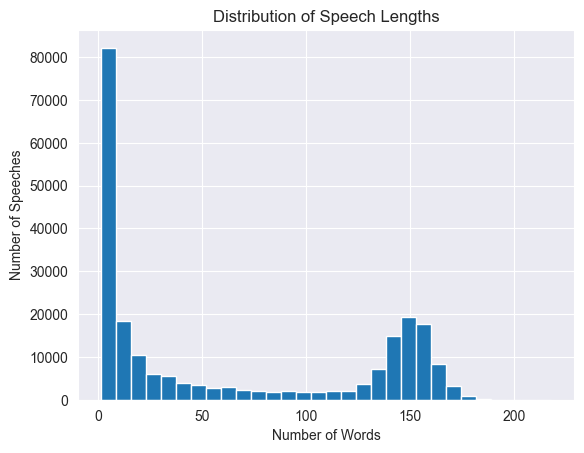

In [13]:
corpus_df['speech_length'].hist(bins=30)
plt.xlabel('Number of Words')
plt.ylabel('Number of Speeches')
plt.title('Distribution of Speech Lengths')
plt.show()

In [14]:
# Compute average speech length
avg_speech_with_names = corpus_df.groupby('Speaker_ID').agg({
    'speech_length': 'mean',
    'Speaker_name': 'first',
    'Speaker_party': 'first',
}).rename(columns={'speech_length': 'avg_speech_length'})
# Sort and select top N
top_speaker_amount = 10
topk_df = avg_speech_with_names.sort_values(by='avg_speech_length', ascending=False).head(top_speaker_amount)

# Use Speaker_name as index for plotting
topk_df = topk_df.set_index('Speaker_name')
topk_df

,avg_speech_length,Speaker_party
Speaker_name,,
"Rauskala, Iris",174.000000,-
"Heide, Hannes",168.000000,SPÖ
"Ban, Ki-moon",168.000000,-
"Voggenhuber, Johannes",166.000000,Grüne
"Vollath, Bettina",166.000000,SPÖ
"List, Daniela",165.500000,ÖVP
"Danninger, Jochen",164.666667,-
"Bierlein, Brigitte",163.000000,-
"Schmidt, Claudia",163.000000,ÖVP


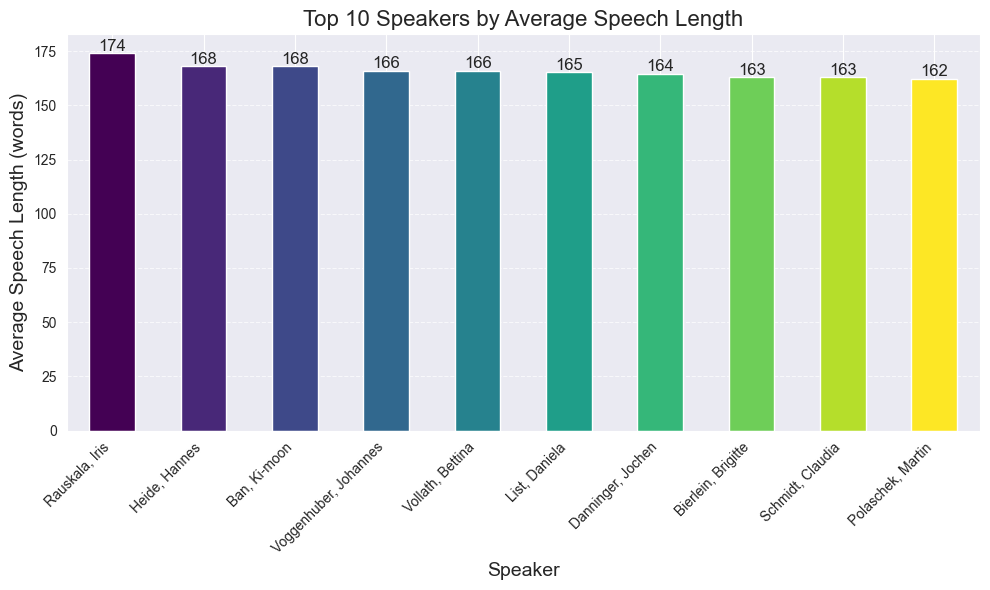

In [15]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, top_speaker_amount))
topk_df['avg_speech_length'].plot(kind='bar', color=colors)

plt.title(f'Top {top_speaker_amount} Speakers by Average Speech Length', fontsize=16)
plt.xlabel('Speaker', fontsize=14)
plt.ylabel('Average Speech Length (words)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, v in enumerate(topk_df['avg_speech_length']):
    plt.text(i, v + 1, int(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
party_counts = corpus_df['Speaker_party'].value_counts()
party_counts

Speaker_party
SPÖ         74345
ÖVP         70874
FPÖ         48332
Grüne       16440
BZÖ          4493
-            3852
NEOS         3561
LIF          1918
STRONACH     1611
JETZT         617
GRÜNE         279
Name: count, dtype: int64

In [17]:
# group by party and sum the speech lengths
total_speech_party = corpus_df.groupby('Speaker_party')['speech_length'].sum().sort_values(ascending=False)
total_speech_party

Speaker_party
SPÖ         4055907
ÖVP         4013115
FPÖ         2783299
Grüne       1747073
BZÖ          497903
NEOS         457556
-            404147
LIF          218405
STRONACH     204986
JETZT         73594
GRÜNE         33265
Name: speech_length, dtype: int64

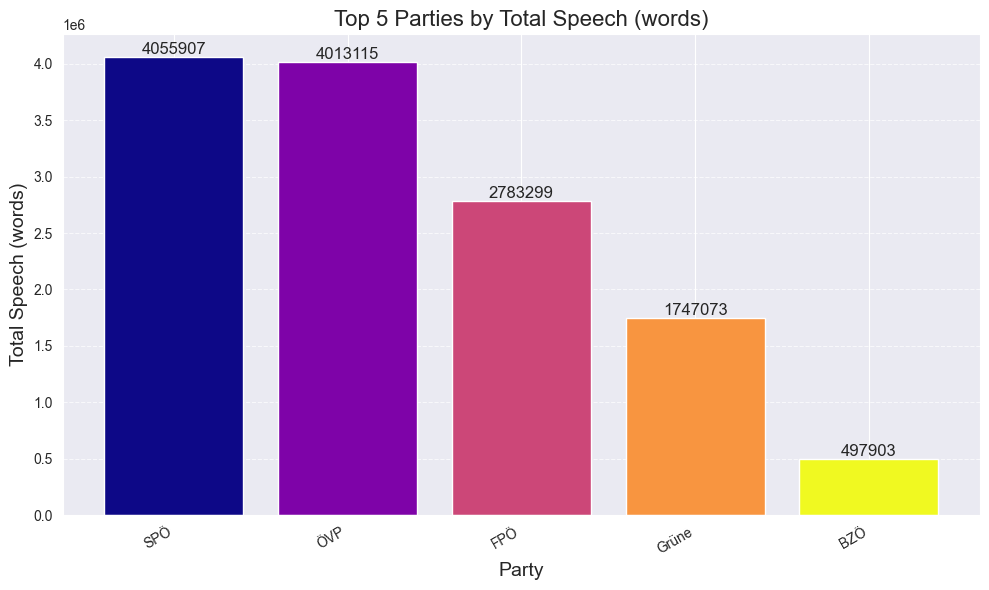

In [18]:
# Select top N parties and plot
t_speech_part_amt = 5
topk_party = total_speech_party.head(t_speech_part_amt)
plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(np.linspace(0, 1, t_speech_part_amt))
bars = plt.bar(topk_party.index, topk_party.values, color=colors)
plt.title(f'Top {t_speech_part_amt} Parties by Total Speech (words)', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Total Speech (words)', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, int(height), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()


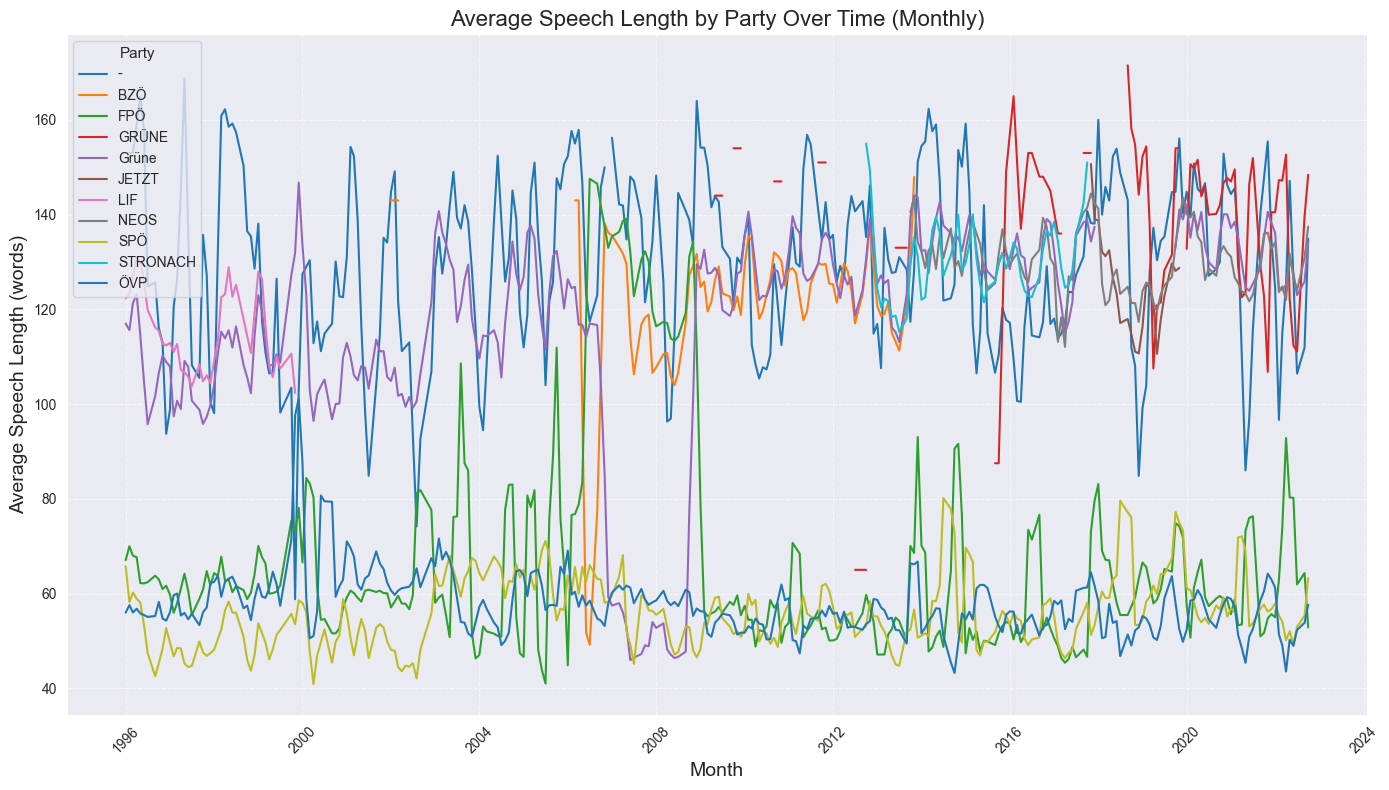

In [19]:
# Ensure 'Date' is in datetime format
corpus_df['Date'] = pd.to_datetime(corpus_df['Date'])
corpus_df['Month'] = corpus_df['Date'].dt.to_period('M').dt.to_timestamp()
if 'speech_length' not in corpus_df.columns:
    corpus_df['speech_length'] = corpus_df['text'].str.split().str.len()

# Group by month and party
monthly_avg_df = corpus_df.groupby(['Month', 'Speaker_party'])['speech_length'].mean().reset_index()

# Pivot so each party has its own column
pivot_df = monthly_avg_df.pivot(index='Month', columns='Speaker_party', values='speech_length')
pivot_df = pivot_df.rolling(window=3, min_periods=1).mean()

# Plotting
plt.figure(figsize=(14, 8))
for party in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[party], label=party)

plt.title('Average Speech Length by Party Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Speech Length (words)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Party', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

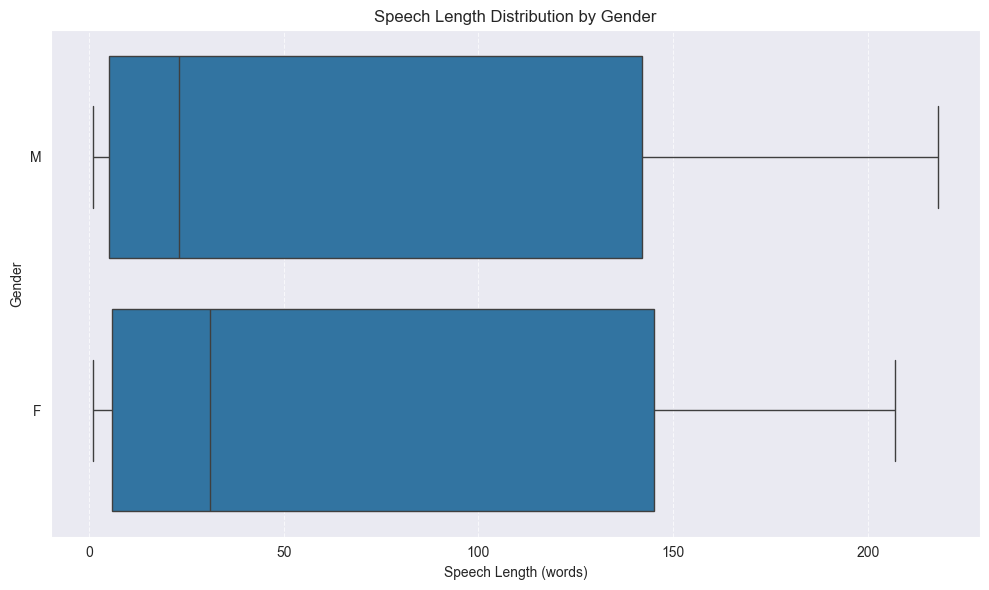

In [20]:
# speach distribution by gender for each party
plt.figure(figsize=(10, 6))
sns.boxplot(data=corpus_df, y='Speaker_gender', x='speech_length')

plt.title('Speech Length Distribution by Gender')
plt.ylabel('Gender')
plt.xlabel('Speech Length (words)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
#plt.xlim(0, 2500)
plt.tight_layout()
plt.show()

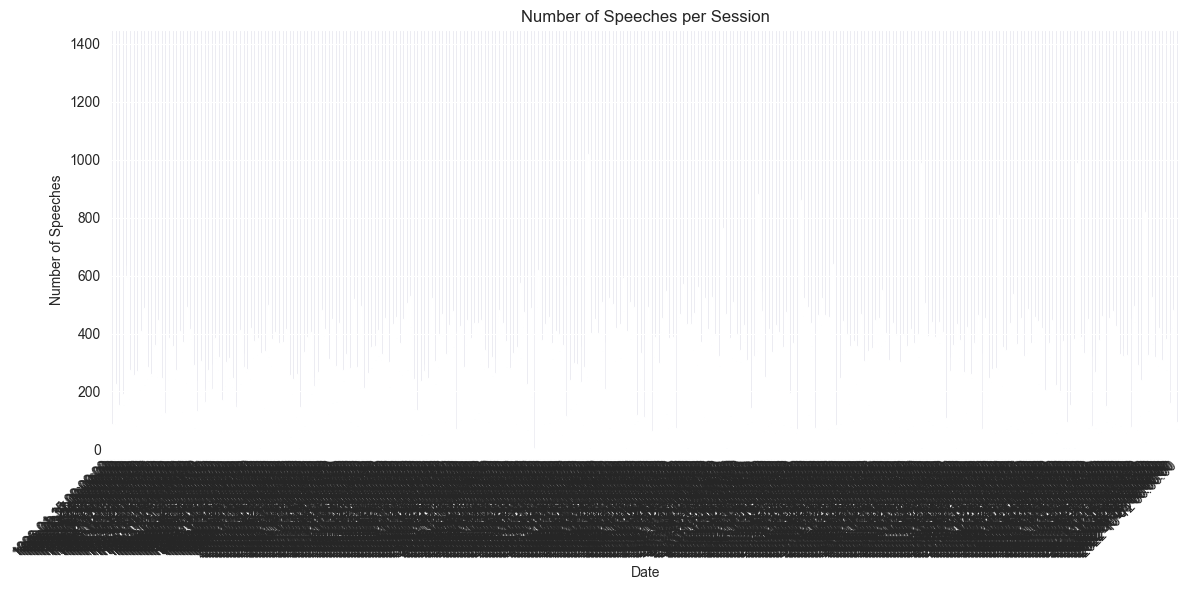

In [21]:
speech_counts = corpus_df.groupby('Date').size()

plt.figure(figsize=(12, 6))
speech_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Speeches per Session')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

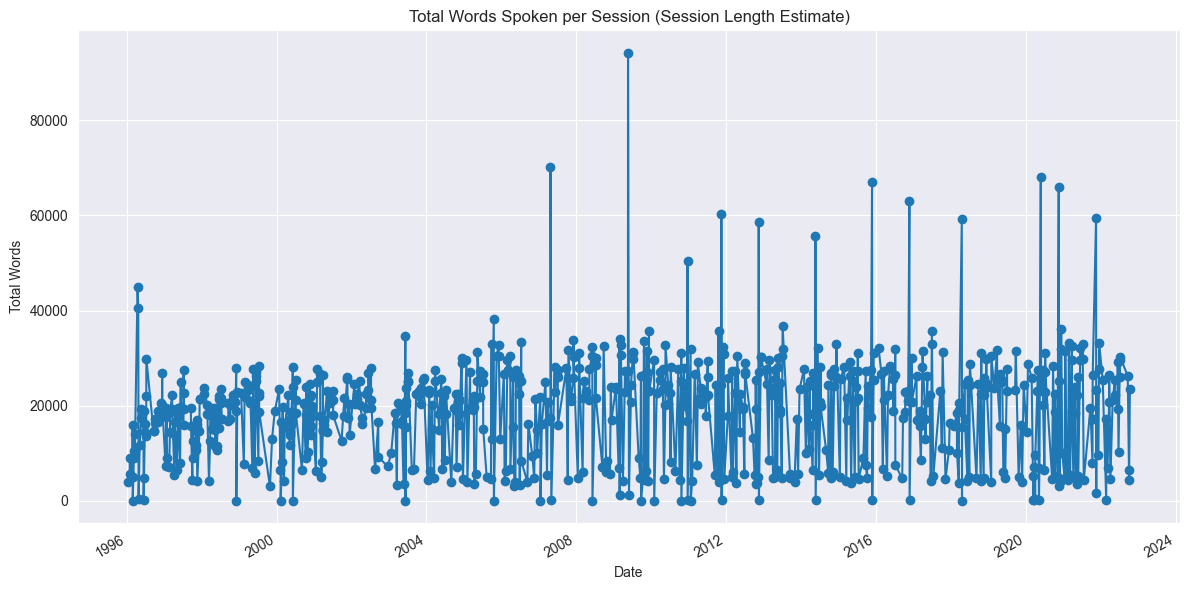

In [22]:
session_length = corpus_df.groupby('Date')['speech_length'].sum()

plt.figure(figsize=(12, 6))
session_length.plot(kind='line', marker='o')

plt.title('Total Words Spoken per Session (Session Length Estimate)')
plt.xlabel('Date')
plt.ylabel('Total Words')
plt.grid(True)
plt.tight_layout()
plt.show()

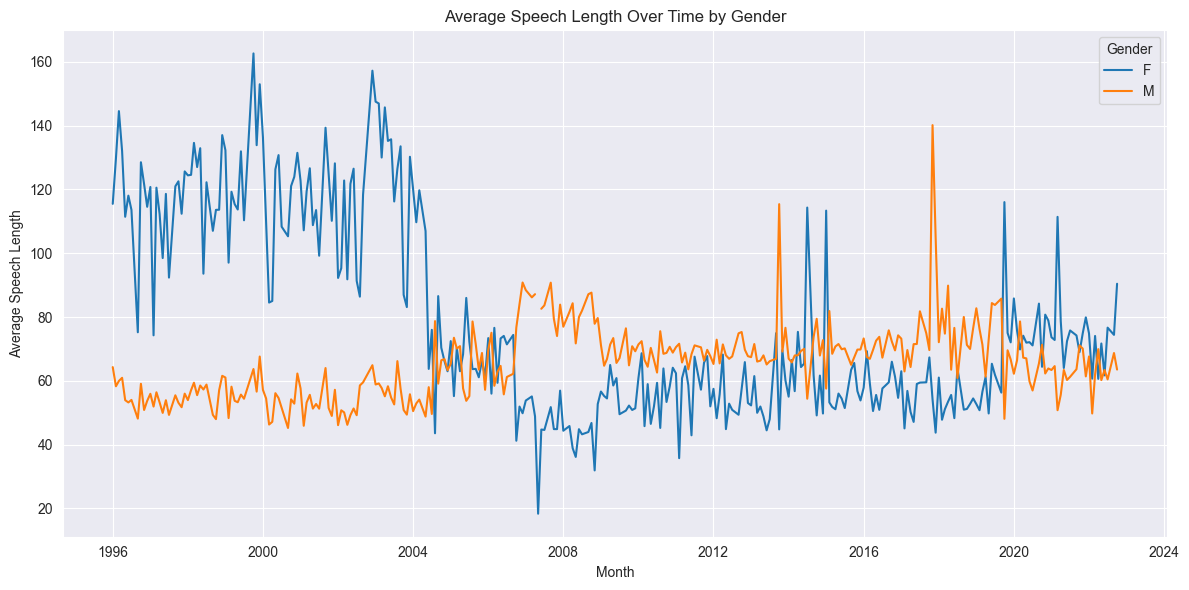

In [23]:
corpus_df['Month'] = corpus_df['Date'].dt.to_period('M').dt.to_timestamp()
monthly_gender = corpus_df.groupby(['Month', 'Speaker_gender'])['speech_length'].mean().reset_index()
pivot_gender = monthly_gender.pivot(index='Month', columns='Speaker_gender', values='speech_length')

plt.figure(figsize=(12, 6))
for gender in pivot_gender.columns:
    plt.plot(pivot_gender.index, pivot_gender[gender], label=gender)

plt.title('Average Speech Length Over Time by Gender')
plt.xlabel('Month')
plt.ylabel('Average Speech Length')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

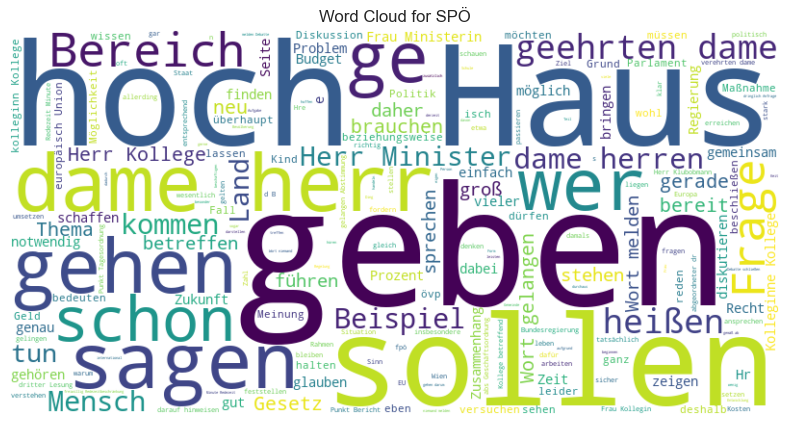

In [24]:
party = 'SPÖ'  # Change as needed
party_text = ' '.join(corpus_df[corpus_df['Speaker_party'] == party]['text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(party_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {party}')
plt.show()

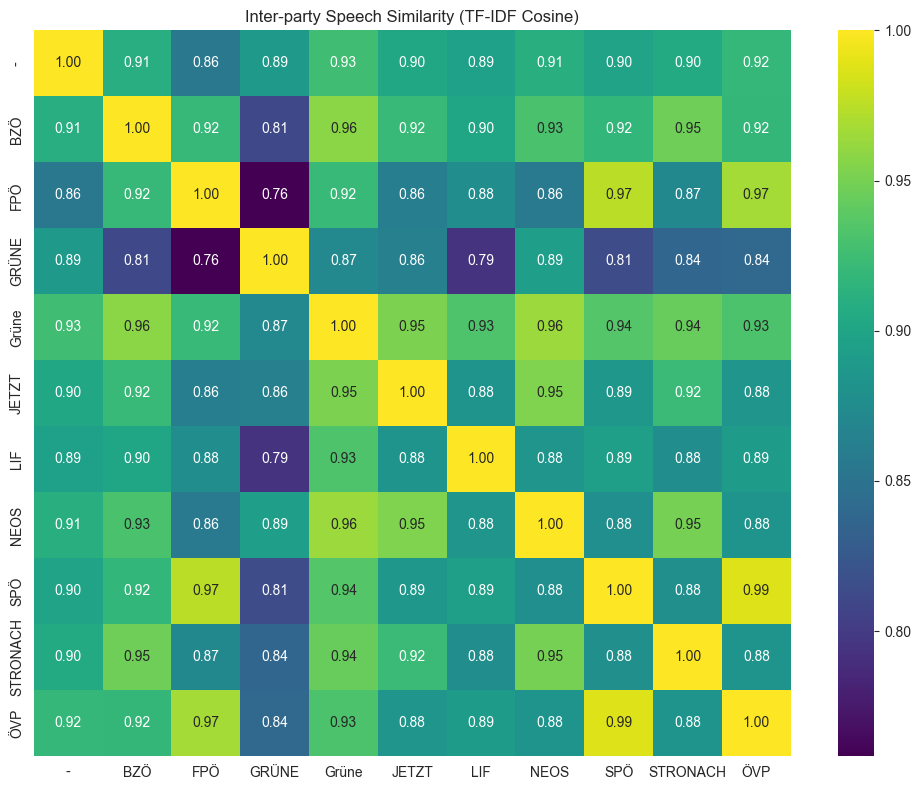

In [25]:
party_texts = corpus_df.groupby('Speaker_party')['text'].apply(lambda texts: ' '.join(texts.dropna()))

# vectorizing using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(party_texts)

# cosine similarity
similarity = cosine_similarity(tfidf_matrix)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity, xticklabels=party_texts.index, yticklabels=party_texts.index, annot=True, fmt=".2f", cmap='viridis')

plt.title('Inter-party Speech Similarity (TF-IDF Cosine)')
plt.tight_layout()
plt.show()
